# Bike Sharing Demand

## CRISP-DM Approach

CRISP-DM stands for Cross-Industry Standard Process for Data Mining and describes a structured approach to understanding, preparing, modeling and evaluating data. This process includes the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

Deployment is not relevant for this type of project, as I won't be deploying my model to a web server. However, my results will be summarized in a blog post on Medium (https://medium.com/@julia.nikulski).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt 

%matplotlib inline


### Exploratory Data Analysis

In [2]:
# read in bike sharing dataset
bike_df = pd.read_csv('bike-sharings.csv')
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# print descriptive statistics
bike_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
# check the datatypes of each variable
bike_df.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Looking at these data types and what the features actually represent, I will convert some of them into categorical variables. 

In [5]:
# change data type of certain features from int to category
feat_int_to_cat = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'dteday']

for feat in feat_int_to_cat:
    bike_df[feat] = bike_df[feat].astype('category')


### Checking for Outliers

In [6]:
# Check for missing values
bike_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping unnecessary columns

In [7]:
# drop the instant feature which is the same as the dataframe index +1
bike_df.drop(columns=['instant'], axis=1, inplace=True)


### Investigating individual columns

#### Season

In [8]:
# investigating feature 'season'
# print unique values of season feature
print(bike_df['season'].unique())

# create dummy variables for all 4 seasons
dummies_season = pd.get_dummies(bike_df['season'], prefix='season')

# remove season column from dataframe
bike_df.drop(columns=['season'], inplace=True)

# add dummy variables to dataframe
bike_df = pd.concat([bike_df, dummies_season], axis=1)

# change column names of the 4 season dummy variables
bike_df = bike_df.rename(columns={'season_1': 'season_spring', 'season_2': 'season_summer', 
                        'season_3': 'season_fall', 'season_4': 'season_winter'})

bike_df



[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_fall,season_winter
0,2011-01-01,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0
1,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0
2,2011-01-03,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0
3,2011-01-04,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0
4,2011-01-05,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0
5,2011-01-06,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,1,0,0,0
6,2011-01-07,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,1,0,0,0
7,2011-01-08,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,1,0,0,0
8,2011-01-09,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,1,0,0,0
9,2011-01-10,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,1,0,0,0


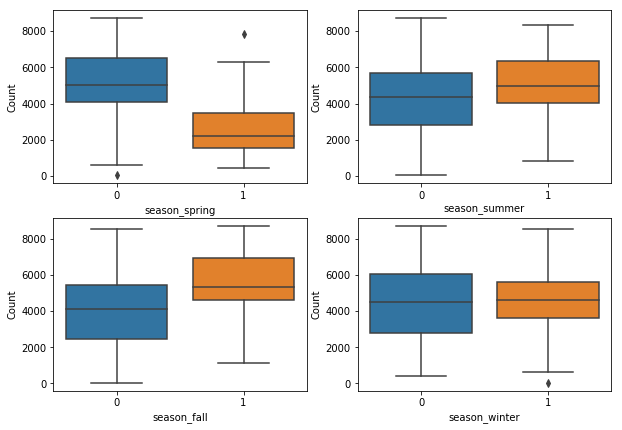

In [9]:
# variable to be used below to iterate through the columns and plot them
season_names = ['season_spring', 'season_summer', 'season_fall', 'season_winter']

# plotting the seasons vs. number of users in a boxplot
fig, ax = plt.subplots(2, 2, figsize = [10, 7])

count = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if j == 1 and i == 2:
            break
        else:
            ax[j][i] = sb.boxplot(data = bike_df, x = season_names[count], y = 'cnt', ax=ax[j][i])
            ax[j][i].set_ylabel('Count')
            ax[j][i].set_xlabel(season_names[count])
            
        count += 1


#### dteday

In [10]:
# create new column with day of the month
bike_df['day'] = bike_df['dteday'].apply(lambda x: x[-2:])

# drop dteday feature
bike_df.drop(columns=['dteday'], axis=1, inplace=True)


In [11]:
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_fall,season_winter,day
0,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0,01
1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,02
2,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0,03
3,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0,04
4,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0,05


In [12]:
# get the number of users per day of the month
users_per_day = bike_df.groupby('day')['cnt'].sum()

# turn pandas series into dataframe
users_per_day_df = users_per_day.to_frame()

# convert index into column
users_per_day_df.reset_index(inplace=True)


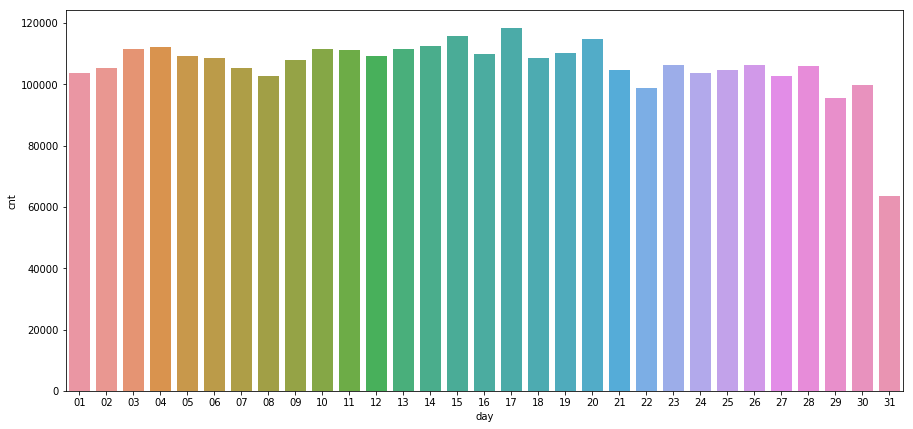

In [13]:
# plot number of users per day of month
plt.figure(figsize=[15,7])
sb.barplot(x='day', y='cnt', data=users_per_day_df);


#### temp

In [28]:
temp_per_month = bike_df.groupby('mnth')['temp'].mean()
temp_per_month

mnth
1     0.236444
2     0.299226
3     0.390539
4     0.469999
5     0.594798
6     0.684097
7     0.755470
8     0.708582
9     0.616485
10    0.485012
11    0.369220
12    0.324031
Name: temp, dtype: float64

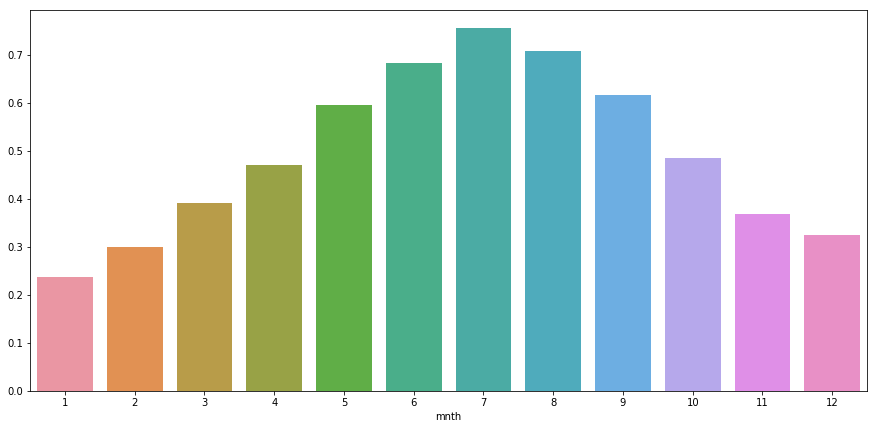

In [31]:
# plot number of users per day of month
plt.figure(figsize=[15,7])
sb.barplot(x=temp_per_month.index, y=temp_per_month.values);

In [33]:
mean_cnt_per_mnth = bike_df.groupby('mnth')['cnt'].mean()
mean_cnt_per_mnth

mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

In [ ]:
# assign x and y1 and y2
x = list(temp_per_month.index)
y1 = temp_per_month.values
y2 = mean_cnt_per_mnth.values

# below code adapted from https://matplotlib.org/gallery/api/two_scales.html
# creat plot containing both average count of customers
# and average temp per month
plt.figure(figsize=[15,7])
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Average temperature', color=color)
ax1.bar(x, y1, color=color);
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Average number of customers', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color);
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


<Figure size 1080x504 with 0 Axes>

#### yr

#### mnth

#### holiday

#### weekday

#### workingday

#### weathersit

#### atemp

#### hum

#### windspeed

#### casual

#### registered

#### cnt

In [15]:
bike_df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_spring', 'season_summer', 'season_fall', 'season_winter',
       'day'],
      dtype='object')